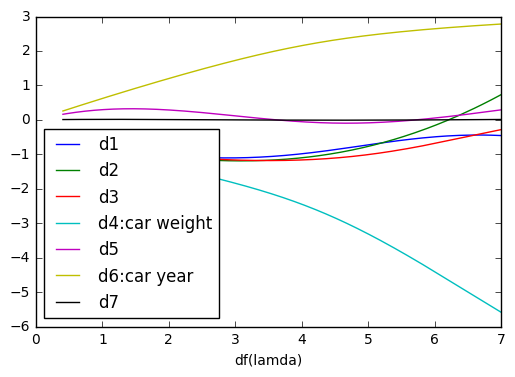

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import csv
import math

identity = np.identity(7)
with open('X_train.csv', 'rb') as xtrain:
    reader1 = csv.reader(xtrain)
    x = list(reader1)
with open('y_train.csv', 'rb') as ytrain:
    reader2 = csv.reader(ytrain)
    y = list(reader2)

with open('X_test.csv', 'rb') as xtest:
    reader3 = csv.reader(xtest)
    x_test = list(reader3)
with open('y_test.csv', 'rb') as ytest:
    reader4 = csv.reader(ytest)
    y_test = list(reader4)

for row in range(len(x_test)):
    for elem in range(len(x_test[0])):
        x_test[row][elem] = float(x_test[row][elem])

for row in range(len(y_test)):
    y_test[row][0] = float(y_test[row][0])

for row in range(len(x)):
    for elem in range(len(x[0])):
        x[row][elem] = float(x[row][elem])

for row in range(len(y)):
    y[row][0] = float(y[row][0])


graph = []

x_t = np.transpose(x)

u, s, v_t = np.linalg.svd(x)

#calculate data for plot

def df_lamda(lamda):
    dflamda = 0
    for i in range(7):
        dflamda += (s[i]**2)/(lamda + s[i]**2)
    return dflamda


feature = [[] for i in range(7)]
df_list = []
for lamda in range(5001):
    
    wrr_p1 = np.linalg.inv(lamda*identity + np.dot(x_t, x))
    wrr = np.dot(np.dot(wrr_p1, x_t), y)
    for i in range(7):
        feature[i].append(wrr[i])
    df_list.append(df_lamda(lamda))
    
#plot the graph
fig, ax = plt.subplots()

ax.plot(df_list, feature[0], label = 'd1')
ax.plot(df_list, feature[1], label = 'd2')
ax.plot(df_list, feature[2], label = 'd3')
ax.plot(df_list, feature[3], label = 'd4:car weight')
ax.plot(df_list, feature[4], label = 'd5')
ax.plot(df_list, feature[5], label = 'd6:car year')
ax.plot(df_list, feature[6], label = 'd7')

ax.legend(loc = 3)
ax.set_xlabel('df(lamda)')

plt.show()






In [14]:
rmse = []

for lamda in range(51):
    wrr_p1 = np.linalg.inv(lamda*identity + np.dot(x_t, x))
    wrr = np.dot(np.dot(wrr_p1, x_t), y)
    rmse.append(math.sqrt(np.dot(np.transpose(y_test - np.dot(x_test, wrr)), y_test - np.dot(x_test, wrr))))
print rmse

[17.06796112084524, 17.141940280926764, 17.213612316050018, 17.28253058066312, 17.348503187836684, 17.41148896393129, 17.471535352061736, 17.52874068195427, 17.583230961362506, 17.63514550911465, 17.684628066592015, 17.731821350966747, 17.77686379273771, 17.81988766827142, 17.86101812500469, 17.900372775963053, 17.938061653633454, 17.974187386023452, 18.0088455050114, 18.042124828085385, 18.074107875049254, 18.104871294885207, 18.134486287043806, 18.163019007497574, 18.19053095394266, 18.217079327219643, 18.242717367791766, 18.267494667262444, 18.291457455634376, 18.3146488654473, 18.337109174172326, 18.358876026354192, 18.37998463702068, 18.400467977851854, 18.42035694754146, 18.439680527703047, 18.458465925583013, 18.476738704748424, 18.494522904824127, 18.511841151262647, 18.528714756044103, 18.5451638101232, 18.561207268364576, 18.576863027640123, 18.592147998697875, 18.607078172355312, 18.621668680517512, 18.63593385247326, 18.649887266879745, 18.66354179980755, 18.676909669182884

In [18]:
plt.figure(2)
plt.plot(x = range(51), y = rmse)
plt.show

<function matplotlib.pyplot.show>